## 1. Import Libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder



## 2. Load Dataset

In [2]:

df=pd.read_csv("kaggle_survey_2017_2021.csv")
df.head()


C:\Users\HP\AppData\Local\Temp\ipykernel_10644\952374893.py:1: DtypeWarning: Columns (0,1,8,9,10,11,12,13,14,15,16,17,18,19,20,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259

,-,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,...,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_9,Q38_B_Part_11,Q38_B_OTHER
0,Year,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,2021,910,50-54,Man,India,Bachelorâ€™s degree,Other,5-10 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,784,50-54,Man,Indonesia,Masterâ€™s degree,Program/Project Manager,20+ years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,924,22-24,Man,Pakistan,Masterâ€™s degree,Software Engineer,1-3 years,Python,NaN,...,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN
4,2021,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Data Cleaning

In [10]:
# Check total missing values per column
print(df.isnull().sum())

# Check percentage of missing values per column
print((df.isnull().mean() * 100).round(2))

# Quick summary of missing values
missing_summary = pd.DataFrame({
    "Missing Values": df.isnull().sum(),
    "Percentage": (df.isnull().mean() * 100).round(2)
})
print(missing_summary)


-                                      0
Time from Start to Finish (seconds)    0
Q1                                     0
Q2                                     0
Q3                                     0
Q4                                     0
Q5                                     0
Q6                                     0
Q7_Part_1                              0
Q8                                     0
Q15                                    0
dtype: int64
-                                      0.0
Time from Start to Finish (seconds)    0.0
Q1                                     0.0
Q2                                     0.0
Q3                                     0.0
Q4                                     0.0
Q5                                     0.0
Q6                                     0.0
Q7_Part_1                              0.0
Q8                                     0.0
Q15                                    0.0
dtype: float64
                                     Missing Val

In [11]:
# Handle missing values (drop columns with >40% missing, fill others with mode/median)

# 1. Drop columns with more than 40% missing values
threshold = 0.4
df = df.loc[:, df.isnull().mean() < threshold]

# 2. Fill categorical (object) columns with Mode (most frequent value)
for col in df.select_dtypes(include='object').columns:
    if df[col].isnull().sum() > 0:   # only fill if missing exists
        df[col] = df[col].fillna(df[col].mode()[0])

# 3. Fill numeric columns with Median
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    if df[col].isnull().sum() > 0:   # only fill if missing exists
        df[col] = df[col].fillna(df[col].median())

# 4. Check if any missing values remain
print(df.isnull().sum().sum(), "missing values left in dataset")


0 missing values left in dataset


In [3]:

# Check for duplicates
duplicates = df.duplicated().sum()

In [4]:
# Drop duplicates
df = df.drop_duplicates()

In [6]:
# Handle missing values (drop columns with >40% missing, fill others with mode/median)
threshold = 0.4
df = df.loc[:, df.isnull().mean() < threshold]

# Fill object (categorical) columns with mode
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Fill numeric columns with median
for col in df.select_dtypes(include=np.number).columns:
    df[col] = df[col].fillna(df[col].median())

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 101846 entries, 0 to 106301
Data columns (total 11 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   -                                    101846 non-null  object
 1   Time from Start to Finish (seconds)  101846 non-null  object
 2   Q1                                   101846 non-null  object
 3   Q2                                   101846 non-null  object
 4   Q3                                   101846 non-null  object
 5   Q4                                   101846 non-null  object
 6   Q5                                   101846 non-null  object
 7   Q6                                   101846 non-null  object
 8   Q7_Part_1                            101846 non-null  object
 9   Q8                                   101846 non-null  object
 10  Q15                                  101846 non-null  object
dtypes: object(11)
memory usage: 9.3

In [14]:
# Check inconsistent formatting in categorical columns
for col in df.select_dtypes(include='object').columns:
    print(f"\nUnique values in column: {col}")
    print(df[col].unique()[:20])  # show first 20 unique values
    print("Total unique:", df[col].nunique())

# --- Cleaning Step ---
# Standardize formatting (strip spaces + lowercase)
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()         # remove leading/trailing spaces
    df[col] = df[col].str.replace(r'\s+', ' ', regex=True)  # replace multiple spaces with single
    df[col] = df[col].str.lower()         # make all lowercase for consistency

# Re-check after cleaning
for col in df.select_dtypes(include='object').columns:
    print(f"\nAfter Cleaning - Unique values in {col}:")
    print(df[col].unique()[:20])
    print("Total unique:", df[col].nunique())




## 4. Handle Categorical Variables

In [15]:
from sklearn.preprocessing import LabelEncoder

# ---------- Data Cleaning ----------

# 1. Drop columns with more than 40% missing values
threshold = 0.4
df = df.loc[:, df.isnull().mean() < threshold]

In [16]:
# 2. Fill missing values
for col in df.select_dtypes(include='object').columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])

for col in df.select_dtypes(include=['int64', 'float64']).columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].median())

In [17]:
# 3. Fix inconsistent formatting in categorical columns
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()
    df[col] = df[col].str.replace(r'\s+', ' ', regex=True)
    df[col] = df[col].str.lower()


In [18]:
# ---------- Label Encoding ----------

label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le   # store encoder for inverse transform if needed

# ---------- Check Result ----------
print("DataFrame shape:", df.shape)
print("Data types after encoding:\n", df.dtypes)
print(df.head())

DataFrame shape: (101846, 11)
Data types after encoding:
 -                                      int32
Time from Start to Finish (seconds)    int32
Q1                                     int32
Q2                                     int32
Q3                                     int32
Q4                                     int32
Q5                                     int32
Q6                                     int32
Q7_Part_1                              int32
Q8                                     int32
Q15                                    int32
dtype: object
   -  Time from Start to Finish (seconds)  Q1  Q2  Q3  Q4  Q5  Q6  Q7_Part_1  \
0  5                                12517  11   8  26  12  31  14          1   
1  4                                12035   7   3  27   1  19  10          0   
2  4                                11141   7   3  28   6  24   4          0   
3  4                                12118   1   3  47   6  33   2          0   
4  4                             

In [19]:

# Apply Label Encoding to categorical variables
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

df.head()


,-,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q8,Q15
0,5,12517,11,8,26,12,31,14,1,22,11
1,4,12035,7,3,27,1,19,10,0,13,8
2,4,11141,7,3,28,6,24,4,0,13,15
3,4,12118,1,3,47,6,33,2,0,13,12
4,4,9495,6,3,39,2,27,4,0,13,8


## 5. Extract Insights

In [20]:
insights = {}

# Insight 1: Most common age group (Q1)
if 'Q1' in df.columns:
    insights['Top Age Group'] = df['Q1'].value_counts().idxmax()

# Insight 2: Most common gender (Q2)
if 'Q2' in df.columns:
    insights['Top Gender'] = df['Q2'].value_counts().idxmax()

# Insight 3: Most common country (Q3)
if 'Q3' in df.columns:
    insights['Top Country'] = df['Q3'].value_counts().idxmax()

# Insight 4: Education level (Q4)
if 'Q4' in df.columns:
    insights['Top Education'] = df['Q4'].value_counts().idxmax()

# Insight 5: Job Role (Q5)
if 'Q5' in df.columns:
    insights['Top Job Role'] = df['Q5'].value_counts().idxmax()

# Insight 6: Programming Language (Q7_Part_1)
if 'Q7_Part_1' in df.columns:
    insights['Top Language'] = df['Q7_Part_1'].value_counts().idxmax()

insights



{'Top Age Group': 2,
 'Top Gender': 2,
 'Top Country': 27,
 'Top Education': 6,
 'Top Job Role': 35,
 'Top Language': 0}

## 6. Dashboard: Top 5 Insights

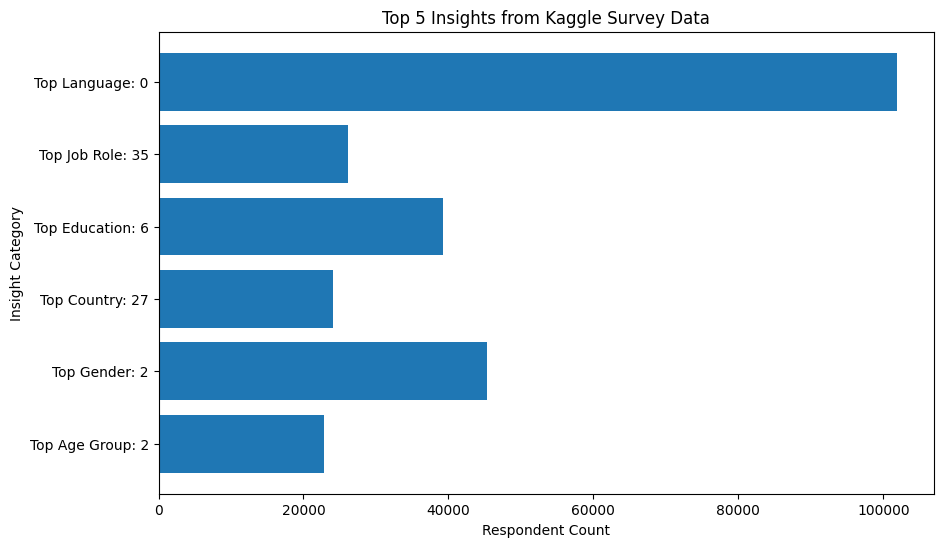

In [21]:

insights = {}

# Example with counts
if 'Q1' in df.columns:
    top_age = df['Q1'].value_counts().idxmax()
    age_count = df['Q1'].value_counts().max()
    insights['Top Age Group'] = (top_age, age_count)

if 'Q2' in df.columns:
    top_gender = df['Q2'].value_counts().idxmax()
    gender_count = df['Q2'].value_counts().max()
    insights['Top Gender'] = (top_gender, gender_count)

if 'Q3' in df.columns:
    top_country = df['Q3'].value_counts().idxmax()
    country_count = df['Q3'].value_counts().max()
    insights['Top Country'] = (top_country, country_count)

if 'Q4' in df.columns:
    top_edu = df['Q4'].value_counts().idxmax()
    edu_count = df['Q4'].value_counts().max()
    insights['Top Education'] = (top_edu, edu_count)

if 'Q5' in df.columns:
    top_role = df['Q5'].value_counts().idxmax()
    role_count = df['Q5'].value_counts().max()
    insights['Top Job Role'] = (top_role, role_count)

if 'Q7_Part_1' in df.columns:
    top_lang = df['Q7_Part_1'].value_counts().idxmax()
    lang_count = df['Q7_Part_1'].value_counts().max()
    insights['Top Language'] = (top_lang, lang_count)

# Convert to labels + counts for plotting
labels = [f"{k}: {v[0]}" for k,v in insights.items()]
counts = [v[1] for v in insights.values()]

# Plot
plt.figure(figsize=(10,6))
plt.barh(labels, counts)
plt.xlabel("Respondent Count")
plt.ylabel("Insight Category")
plt.title("Top 5 Insights from Kaggle Survey Data")
plt.show()



## 7. Conclusions
 
- **Data Cleaning**: Removed duplicates, handled missing values by dropping columns with more than 40% missing data, and filled the remaining gaps using mode (for categorical variables) and median (for numerical variables).  
- **Formatting Consistency**: Standardized categorical values by removing extra spaces, fixing spacing issues, and converting text to lowercase.  
- **Categorical Encoding**: Applied Label Encoding to transform categorical variables into numerical codes, enabling further analysis and modeling.  
- **Insights Extraction**: Identified the most common respondent characteristics, including top age group, gender, country, education level, job role, and preferred programming language.  
- **Visualization**: Created a summary dashboard displaying the top insights for a clear and concise understanding of respondent behavior.  